In [2]:
import pandas as pd
import numpy as np
import pickle
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [3]:

with open(r"embdding_df.csv", "rb") as input_file:
    embedding_df = pickle.load(input_file)

In [4]:
with open('./NR1_ids.txt', 'r') as file:
    nr1_names = set(line.strip() for line in file)

with open('./NR4_ids.txt', 'r') as file:
    nr4_names = set(line.strip() for line in file)


def tag_node(info):
    if info in nr1_names:
        return 'NR1'
    elif info in nr4_names:
        return 'NR4'
    else:
        return 'Other'

# Apply the tagging function to the DataFrame
embedding_df['Clade'] = embedding_df['info'].apply(tag_node)



# subset_df.head(n=20)

## Add the interproscan results
NR_MSA_ancestors_unaligned.fa.tsv was generated on bioinfr using interproscan

In [5]:
column_names = [
        "info",
        "label",
        "sub_label",
        "description",
        "start",
        "stop",
        "score",
        "status",
        "date",
        "extended_description"
    ]
selected_columns = [0, 3, 4, 5, 6, 7, 8, 9, 10, 12]


interpro_df = pd.read_csv("./NR_MSA_ancestors_unaligned.fa.tsv", sep="\t", usecols=selected_columns, names=column_names)


In [25]:
interpro_df.head(n=5)

,info,label,sub_label,description,start,stop,score,status,date,extended_description
0,N2877,Gene3D,G3DSA:1.10.565.10,Retinoid X Receptor,3,233,2.1E-103,T,03-09-2024,Nuclear hormone receptor-like domain superfamily
1,N2877,Pfam,PF00104,Ligand-binding domain of nuclear hormone receptor,41,217,3.6E-37,T,03-09-2024,"Nuclear hormone receptor, ligand-binding domain"
2,N2877,PRINTS,PR00545,Retinoid X receptor signature,124,142,1.6E-34,T,03-09-2024,Retinoid X receptor/HNF4
3,N2877,PRINTS,PR00545,Retinoid X receptor signature,98,123,1.6E-34,T,03-09-2024,Retinoid X receptor/HNF4
4,N2877,PRINTS,PR00545,Retinoid X receptor signature,165,184,1.6E-34,T,03-09-2024,Retinoid X receptor/HNF4


In [32]:
interpro_df[interpro_df['info'] == 'N9923']

,info,label,sub_label,description,start,stop,score,status,date,extended_description
65150,N9923,PRINTS,PR00398,Steroid hormone receptor signature,135,150,1.7E-20,T,03-09-2024,Nuclear hormone receptor
65151,N9923,PRINTS,PR00398,Steroid hormone receptor signature,193,210,1.7E-20,T,03-09-2024,Nuclear hormone receptor
65152,N9923,PRINTS,PR00398,Steroid hormone receptor signature,69,85,1.7E-20,T,03-09-2024,Nuclear hormone receptor
65153,N9923,PRINTS,PR00398,Steroid hormone receptor signature,48,69,1.7E-20,T,03-09-2024,Nuclear hormone receptor
65154,N9923,SUPERFAMILY,SSF48508,Nuclear receptor ligand-binding domain,2,235,5.24E-68,T,03-09-2024,Nuclear hormone receptor-like domain superfamily
65155,N9923,PRINTS,PR01284,Orphan nuclear receptor (4A nuclear receptor) ...,160,177,6.9E-68,T,03-09-2024,Nuclear receptor subfamily 4 group A member 1-3
65156,N9923,PRINTS,PR01284,Orphan nuclear receptor (4A nuclear receptor) ...,214,235,6.9E-68,T,03-09-2024,Nuclear receptor subfamily 4 group A member 1-3
65157,N9923,PRINTS,PR01284,Orphan nuclear receptor (4A nuclear receptor) ...,93,113,6.9E-68,T,03-09-2024,Nuclear receptor subfamily 4 group A member 1-3
65158,N9923,PRINTS,PR01284,Orphan nuclear receptor (4A nuclear receptor) ...,193,213,6.9E-68,T,03-09-2024,Nuclear receptor subfamily 4 group A member 1-3
65159,N9923,PRINTS,PR01284,Orphan nuclear receptor (4A nuclear receptor) ...,43,57,6.9E-68,T,03-09-2024,Nuclear receptor subfamily 4 group A member 1-3


In [7]:
embedding_df.head(n=3)

,info,sequence,model_name,protbert_mean_embedding,protbert_cls_embedding,protbert_max_embedding,protbert_weighted_embedding,Clade
0,N0,TCAKLEPEDADENIDVTGNEPERTSTEYQMSPYPSASPESVYETSA...,yarongef/DistilProtBert,"[-0.17380047, 0.037478294, 0.049007155, -0.013...","[0.037427068, 0.075575374, -0.036185384, -0.23...","[0.12167235, 0.28130862, 0.21617526, 0.2462811...","[-0.10807977, 0.01987329, 0.028579468, -0.0042...",Other
1,N1,TCAKLEPEDADENIDVTGNEPERTSTEYQMSPYPSASPESVYETSA...,yarongef/DistilProtBert,"[-0.17380047, 0.037478294, 0.049007155, -0.013...","[0.037427068, 0.075575374, -0.036185384, -0.23...","[0.12167235, 0.28130862, 0.21617526, 0.2462811...","[-0.10807977, 0.01987329, 0.028579468, -0.0042...",Other
2,N2,TCAKLEPEDADENIDVTGNEPERTSTEYQMSPYPSASPESVYETSA...,yarongef/DistilProtBert,"[-0.17380047, 0.037478294, 0.049007155, -0.013...","[0.037427068, 0.075575374, -0.036185384, -0.23...","[0.12167235, 0.28130862, 0.21617526, 0.2462811...","[-0.10807977, 0.01987329, 0.028579468, -0.0042...",Other


In [8]:
interpro_df.head(n=5)

,info,label,sub_label,description,start,stop,score,status,date,extended_description
0,N2877,Gene3D,G3DSA:1.10.565.10,Retinoid X Receptor,3,233,2.1E-103,T,03-09-2024,Nuclear hormone receptor-like domain superfamily
1,N2877,Pfam,PF00104,Ligand-binding domain of nuclear hormone receptor,41,217,3.6E-37,T,03-09-2024,"Nuclear hormone receptor, ligand-binding domain"
2,N2877,PRINTS,PR00545,Retinoid X receptor signature,124,142,1.6E-34,T,03-09-2024,Retinoid X receptor/HNF4
3,N2877,PRINTS,PR00545,Retinoid X receptor signature,98,123,1.6E-34,T,03-09-2024,Retinoid X receptor/HNF4
4,N2877,PRINTS,PR00545,Retinoid X receptor signature,165,184,1.6E-34,T,03-09-2024,Retinoid X receptor/HNF4


In [9]:
# Merge the two DataFrames on the 'ID' column
merged_df = embedding_df.merge(interpro_df, on='info', how='left')

# Pivot the merged DataFrame to create a column for each Database
pivot_df = merged_df.pivot_table(index='info', columns='label', values='extended_description', aggfunc=lambda x: '; '.join(x))

# Reset index to flatten the DataFrame
pivot_df = pivot_df.reset_index()
final_df = embedding_df.merge(pivot_df, on=['info'], how='left')

# Final_df

Now the final_df should have the sequence data, the embeddings, and the interpro details

In [10]:
final_df.head(n=5)

,info,sequence,model_name,protbert_mean_embedding,protbert_cls_embedding,protbert_max_embedding,protbert_weighted_embedding,Clade,CDD,Coils,FunFam,Gene3D,MobiDBLite,PANTHER,PRINTS,Pfam,ProSiteProfiles,SMART,SUPERFAMILY
0,N0,TCAKLEPEDADENIDVTGNEPERTSTEYQMSPYPSASPESVYETSA...,yarongef/DistilProtBert,"[-0.17380047, 0.037478294, 0.049007155, -0.013...","[0.037427068, 0.075575374, -0.036185384, -0.23...","[0.12167235, 0.28130862, 0.21617526, 0.2462811...","[-0.10807977, 0.01987329, 0.028579468, -0.0042...",Other,-,NaN,-,Nuclear hormone receptor-like domain superfamily,-; -,-,Nuclear hormone receptor; Nuclear hormone rece...,"Nuclear hormone receptor, ligand-binding domain","Nuclear hormone receptor, ligand-binding domain","Nuclear hormone receptor, ligand-binding domain",Nuclear hormone receptor-like domain superfamily
1,N1,TCAKLEPEDADENIDVTGNEPERTSTEYQMSPYPSASPESVYETSA...,yarongef/DistilProtBert,"[-0.17380047, 0.037478294, 0.049007155, -0.013...","[0.037427068, 0.075575374, -0.036185384, -0.23...","[0.12167235, 0.28130862, 0.21617526, 0.2462811...","[-0.10807977, 0.01987329, 0.028579468, -0.0042...",Other,-,NaN,-,Nuclear hormone receptor-like domain superfamily,-; -,-,Nuclear hormone receptor; Nuclear hormone rece...,"Nuclear hormone receptor, ligand-binding domain","Nuclear hormone receptor, ligand-binding domain","Nuclear hormone receptor, ligand-binding domain",Nuclear hormone receptor-like domain superfamily
2,N2,TCAKLEPEDADENIDVTGNEPERTSTEYQMSPYPSASPESVYETSA...,yarongef/DistilProtBert,"[-0.17380047, 0.037478294, 0.049007155, -0.013...","[0.037427068, 0.075575374, -0.036185384, -0.23...","[0.12167235, 0.28130862, 0.21617526, 0.2462811...","[-0.10807977, 0.01987329, 0.028579468, -0.0042...",Other,-,NaN,-,Nuclear hormone receptor-like domain superfamily,-; -,-,Nuclear hormone receptor; Nuclear hormone rece...,"Nuclear hormone receptor, ligand-binding domain","Nuclear hormone receptor, ligand-binding domain","Nuclear hormone receptor, ligand-binding domain",Nuclear hormone receptor-like domain superfamily
3,N3,TCAKLEPEDADENIDVTGNEPERTSTEYPMSPYPSASPESVYETSA...,yarongef/DistilProtBert,"[-0.17028484, 0.036823433, 0.049609266, -0.010...","[0.04245688, 0.08160813, -0.030255817, -0.2466...","[0.11976309, 0.27247024, 0.21556818, 0.2510118...","[-0.10674974, 0.019780792, 0.028877182, -0.003...",Other,-,NaN,-,Nuclear hormone receptor-like domain superfamily,-; -,-,Nuclear hormone receptor; Nuclear hormone rece...,"Nuclear hormone receptor, ligand-binding domain","Nuclear hormone receptor, ligand-binding domain","Nuclear hormone receptor, ligand-binding domain",Nuclear hormone receptor-like domain superfamily
4,N4,TCAKLEPEDADENIDVTGNEPERTSTEYPMSPYPSASPEGVYETSA...,yarongef/DistilProtBert,"[-0.1697389, 0.035590477, 0.050194185, -0.0116...","[0.040663913, 0.08406882, -0.034715842, -0.248...","[0.122089, 0.27262154, 0.21623468, 0.24625377,...","[-0.10627797, 0.01953295, 0.029021893, -0.0033...",Other,-,NaN,-,Nuclear hormone receptor-like domain superfamily,-,-,-; -; -; -; -; Nuclear hormone receptor; Nucle...,"Nuclear hormone receptor, ligand-binding domain","Nuclear hormone receptor, ligand-binding domain","Nuclear hormone receptor, ligand-binding domain",Nuclear hormone receptor-like domain superfamily


In [11]:
# Only include NR1 and NR4
subset_df = final_df[final_df['Clade'].isin(['NR1', 'NR4'])]

# Add in the parent of  N3281 in the subset
additional_rows = embedding_df[embedding_df['info'] == 'N3281']
subset_df = pd.concat([subset_df, additional_rows])
subset_df['has_subfamily_4'] = subset_df['PRINTS'].str.contains('subfamily 4', na=False)


In [31]:
subset_df.head(n=5)

,info,sequence,model_name,protbert_mean_embedding,protbert_cls_embedding,protbert_max_embedding,protbert_weighted_embedding,Clade,CDD,Coils,...,MobiDBLite,PANTHER,PRINTS,Pfam,ProSiteProfiles,SMART,SUPERFAMILY,has_subfamily_4,pca1,pca2
3282,N3282,EELIEKLLEAHLETFPPTLSDFKKFREGGPPPDGGKADQEMFEQFS...,yarongef/DistilProtBert,"[-0.13864586, -0.028329106, 0.019978482, -0.05...","[0.13162987, 0.04113035, -0.04237596, -0.20195...","[0.1563627, 0.21076381, 0.20401585, 0.19906853...","[-0.07931022, -0.020921838, 0.011999476, -0.02...",NR1,NaN,NaN,...,NaN,-,Nuclear hormone receptor; Nuclear hormone rece...,"Nuclear hormone receptor, ligand-binding domain","Nuclear hormone receptor, ligand-binding domain","Nuclear hormone receptor, ligand-binding domain",Nuclear hormone receptor-like domain superfamily,False,0.441565,0.891079
3283,N3283,EELIEKVLEAHLETFPPLSQFKKFREGGPPPDGGKADLEMFEQFSE...,yarongef/DistilProtBert,"[-0.1327166, -0.021599585, 0.013646233, -0.063...","[0.12619483, 0.049400687, -0.047701452, -0.197...","[0.14873631, 0.21431793, 0.20995635, 0.2040702...","[-0.07587062, -0.017489605, 0.008099329, -0.02...",NR1,NaN,NaN,...,NaN,-,Thyroid hormone receptor; Thyroid hormone rece...,"Nuclear hormone receptor, ligand-binding domain","Nuclear hormone receptor, ligand-binding domain","Nuclear hormone receptor, ligand-binding domain",Nuclear hormone receptor-like domain superfamily,False,0.420484,0.817813
3284,N3284,WELIRVVTEAHMATIAQGNQWKQKRKFLPEDIGQGPVVNAPEGSKV...,yarongef/DistilProtBert,"[-0.16617796, 0.010754456, 0.052084062, -0.019...","[-0.03436113, 0.13796805, -0.06916676, -0.3015...","[0.12731348, 0.2684112, 0.23578662, 0.22543989...","[-0.094130315, 0.0044511007, 0.028081154, -0.0...",NR1,-,NaN,...,NaN,-,Thyroid hormone receptor; Thyroid hormone rece...,"Nuclear hormone receptor, ligand-binding domain","Nuclear hormone receptor, ligand-binding domain","Nuclear hormone receptor, ligand-binding domain",Nuclear hormone receptor-like domain superfamily,False,1.450521,0.257300
3285,N3285,WELIRVVTEAHMATNAQGNHWKQKRKFLPEDIGQAPIVNAPEGSKV...,yarongef/DistilProtBert,"[-0.16279224, 0.0030026855, 0.049730323, -0.01...","[-0.03484416, 0.1311732, -0.07193057, -0.28468...","[0.12755498, 0.2655929, 0.23363289, 0.2235759,...","[-0.09273568, -0.0006801017, 0.026657011, -0.0...",NR1,-,NaN,...,NaN,-,Nuclear hormone receptor; Nuclear hormone rece...,"Nuclear hormone receptor, ligand-binding domain","Nuclear hormone receptor, ligand-binding domain","Nuclear hormone receptor, ligand-binding domain",Nuclear hormone receptor-like domain superfamily,False,1.490441,0.469088
3286,N3286,WELIRVVTEAHMATNAQGNHWKQKRKFLPEDIGQAPIVNAPEGSKV...,yarongef/DistilProtBert,"[-0.16409202, 0.00022279444, 0.051652472, -0.0...","[-0.034891732, 0.13614103, -0.06634723, -0.295...","[0.12719649, 0.26462835, 0.23789418, 0.2268534...","[-0.093138084, -0.002170972, 0.027753804, -0.0...",NR1,-,NaN,...,NaN,-,Nuclear hormone receptor; Nuclear hormone rece...,"Nuclear hormone receptor, ligand-binding domain","Nuclear hormone receptor, ligand-binding domain","Nuclear hormone receptor, ligand-binding domain",Nuclear hormone receptor-like domain superfamily,False,1.535886,0.461596


In [33]:
# # Set option to display all columns
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_colwidth', None)  # Display full column width
# pd.set_option('display.max_rows', None)      # Display all rows

display(subset_df[subset_df['info']=="N3281"])
display(subset_df[subset_df['info']=="N9923"])

# # Reset display options to default after printing
# pd.reset_option('display.max_columns')

,info,sequence,model_name,protbert_mean_embedding,protbert_cls_embedding,protbert_max_embedding,protbert_weighted_embedding,Clade,CDD,Coils,...,MobiDBLite,PANTHER,PRINTS,Pfam,ProSiteProfiles,SMART,SUPERFAMILY,has_subfamily_4,pca1,pca2
3281,N3281,EELIEKLLEAHLETFPPTLSDFKKFREGGPPPDGGKADQEMFEQFS...,yarongef/DistilProtBert,"[-0.1553571, -0.016661184, 0.039532464, -0.066...","[0.07733889, 0.048346464, -0.024208635, -0.270...","[0.15463449, 0.3000791, 0.21957994, 0.1983978,...","[-0.086701415, -0.01423722, 0.0224734, -0.0315...",Other,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0.438205,0.046657


,info,sequence,model_name,protbert_mean_embedding,protbert_cls_embedding,protbert_max_embedding,protbert_weighted_embedding,Clade,CDD,Coils,...,MobiDBLite,PANTHER,PRINTS,Pfam,ProSiteProfiles,SMART,SUPERFAMILY,has_subfamily_4,pca1,pca2
9923,N9923,VSLISSLVRAHIDSNPAATKLDYSKFQESVSYQSEKEDANDIQQFY...,yarongef/DistilProtBert,"[-0.21263374, 0.020814078, 0.062285744, -0.009...","[0.011768512, 0.10628107, -0.0346425, -0.22971...","[0.05944696, 0.27469152, 0.23495173, 0.2136580...","[-0.11766645, 0.0089208335, 0.03529136, 0.0002...",NR4,-,NaN,...,NaN,-,Nuclear hormone receptor; Nuclear hormone rece...,"Nuclear hormone receptor, ligand-binding domain","Nuclear hormone receptor, ligand-binding domain","Nuclear hormone receptor, ligand-binding domain",Nuclear hormone receptor-like domain superfamily,True,0.605497,-1.005731


/var/folders/xj/l_c4n_qs0817y_gr39wb6pg80000gn/T/ipykernel_56859/473570050.py:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('Set1', num_unique).colors


NR1
NR4
Other


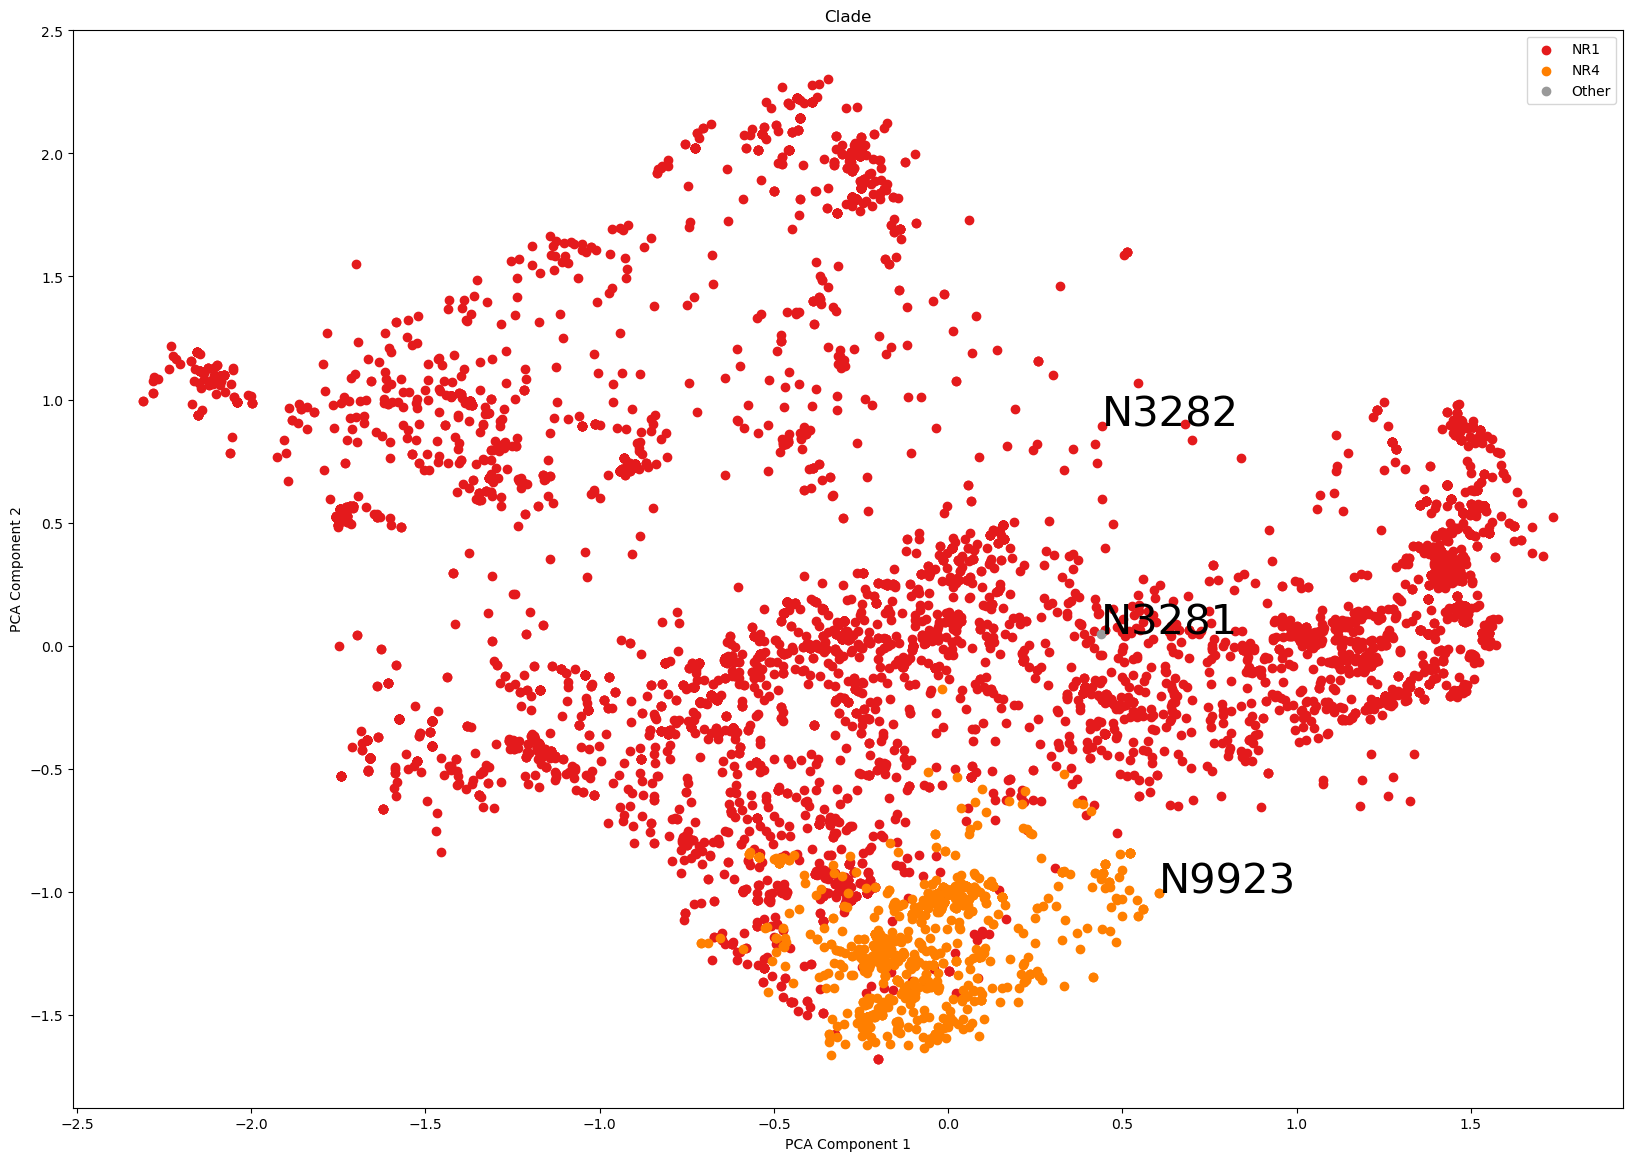

False
True


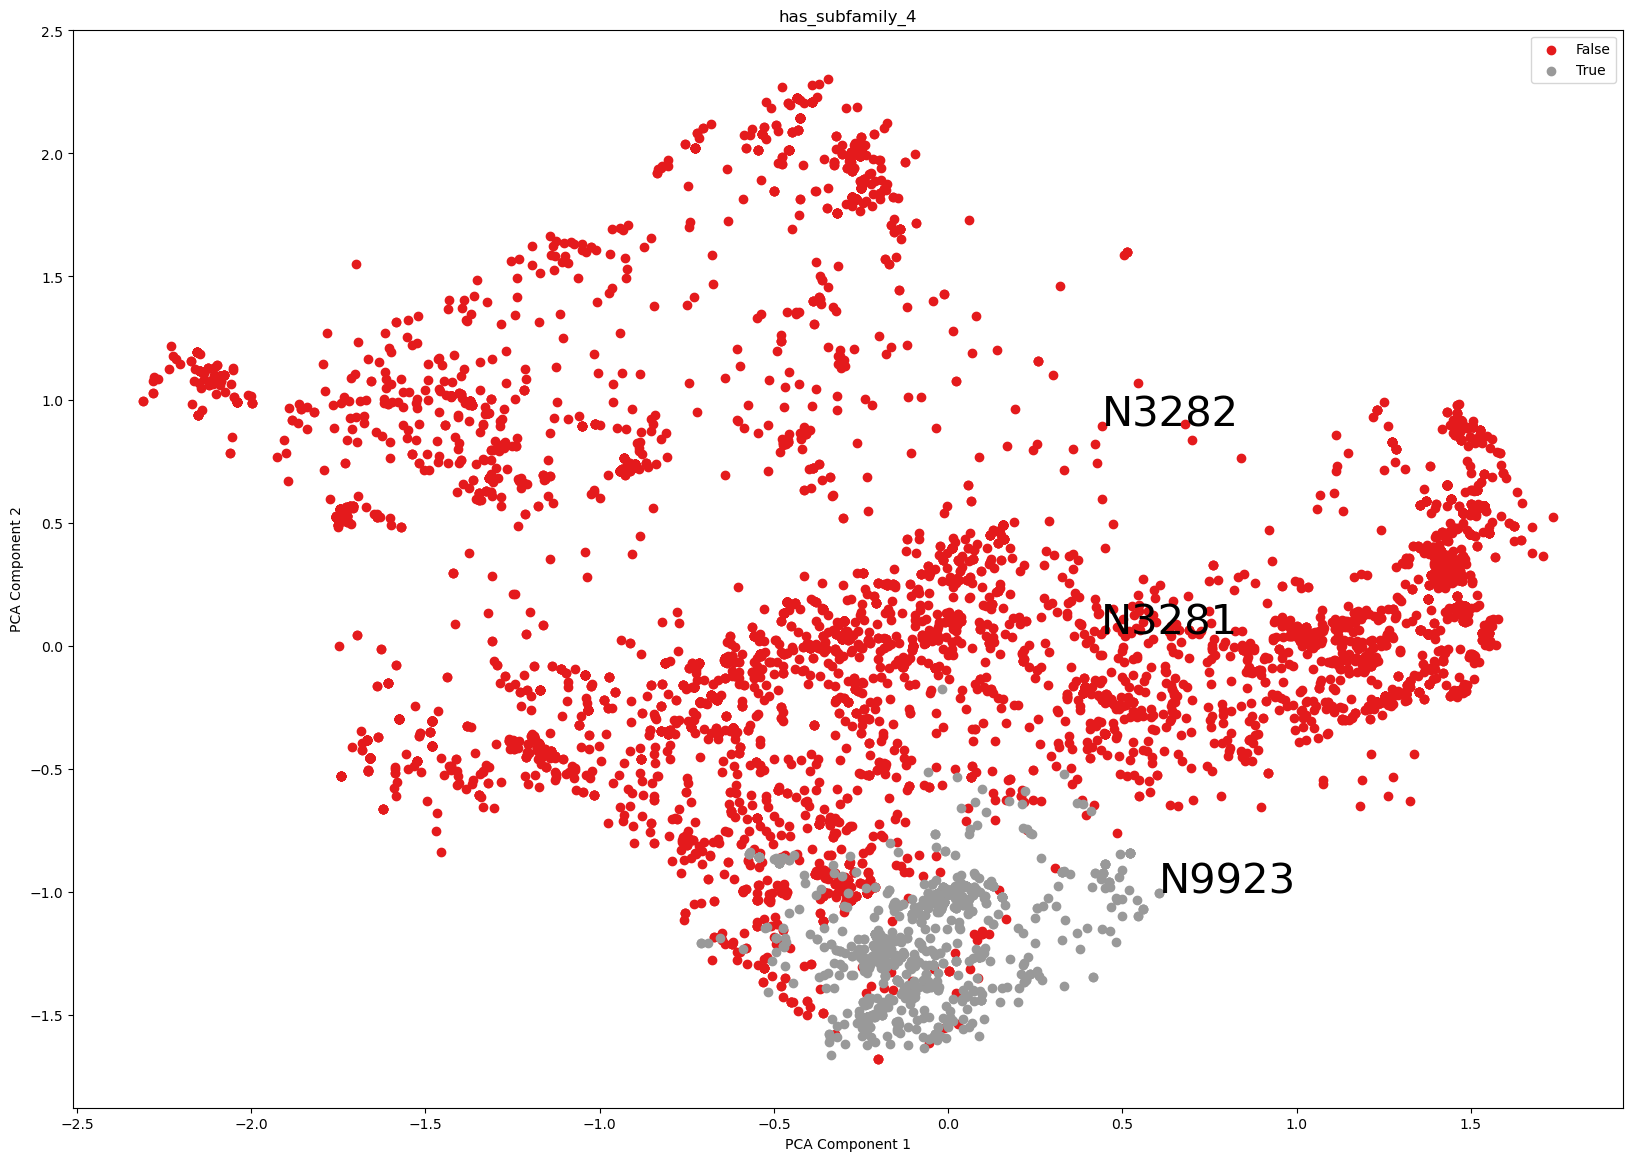

In [13]:



# Stack embeddings into a single numpy array
embeddings = np.vstack(subset_df['protbert_cls_embedding'].values)

# Apply PCA
num_components = 2
pca = PCA(n_components=num_components)
pca_result = pca.fit_transform(embeddings)

# Add PCA results to the DataFrame
subset_df['pca1'] = pca_result[:, 0]
subset_df['pca2'] = pca_result[:, 1]


# for tag in ['tag', 'CDD', 'Coils', 'FunFam',
#        'Gene3D', 'MobiDBLite', 'PANTHER', 'PRINTS', 'Pfam', 'ProSiteProfiles',
#        'SMART', 'SUPERFAMILY', 'has_subfamily_4']:

nodes_to_label = ['N3281', 'N3282', 'N9923']

for tag in ['Clade', 'has_subfamily_4']:
    
    unique_tags = subset_df[tag].unique()
    num_unique = len(unique_tags)

    # Generate a color palette with enough colors
    colors = plt.cm.get_cmap('Set1', num_unique).colors

    plt.figure(figsize=(20, 14))
    for unique_tag, color in zip(unique_tags, colors):
        print(unique_tag) 
        subset = subset_df[subset_df[tag] == unique_tag]
        plt.scatter(subset['pca1'], subset['pca2'], label=unique_tag, color=color)

        # Label specific nodes
        for i, row in subset.iterrows():
            if row['info'] in nodes_to_label:
                plt.text(row['pca1'], row['pca2'], row['info'], fontsize=30, color='black')

    plt.title(tag)
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.legend()
    plt.show()


